In [12]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [13]:
working_dir = os.getcwd()

In [14]:
train_data = pd.read_csv(f"{working_dir}/../data/TrainData.csv")
X_train = train_data["WS10"].values.reshape(-1, 1)  # Features: wind speed at 10m
y_train = train_data["POWER"].values.reshape(-1, 1)  # Target: power generation

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
weather_forecast = pd.read_csv(f"{working_dir}/../data/WeatherForecastInput.csv")
X_test = weather_forecast["WS10"].values.reshape(-1, 1)
y_pred = lin_reg.predict(X_test)

# Save predictions to file
forecast_template = pd.read_csv(f"{working_dir}/../data/ForecastTemplate.csv")
forecast_template['FORECAST'] = y_pred
forecast_template.to_csv(f"{working_dir}/results/ForecastTemplate1-LR.csv", index=False)

In [17]:
solution = pd.read_csv(f"{working_dir}/../data/Solution.csv")
y_true = solution["POWER"].values.reshape(-1, 1)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE for linear regression model:", rmse)

RMSE for linear regression model: 0.216384085623544


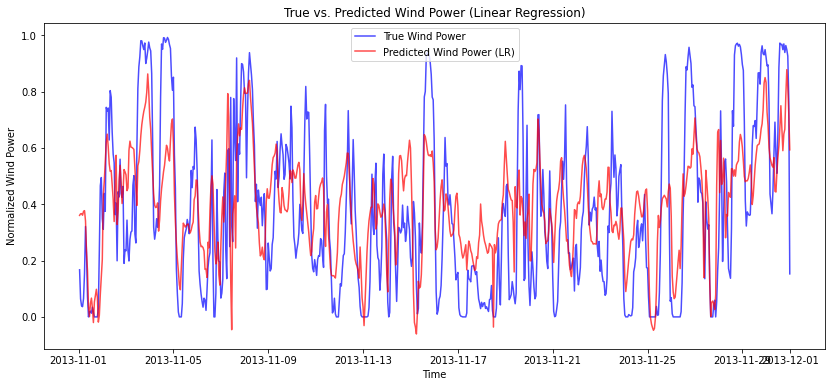

In [18]:
# True vs. Predicted Wind Power (Linear Regression)
# Create a time index for plotting
time_index = pd.to_datetime(weather_forecast['TIMESTAMP'])

# Plot the true wind energy measurements and predicted results
plt.figure(figsize=(14, 6))
plt.plot(time_index, y_true, label="True Wind Power", color='blue', alpha=0.7)
plt.plot(time_index, y_pred, label="Predicted Wind Power (LR)", color='red', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Normalized Wind Power")
plt.title("True vs. Predicted Wind Power (Linear Regression)")
plt.legend()
plt.show()

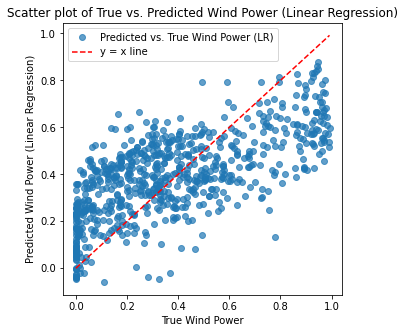

In [19]:
# Scatter plot of true wind energy measurements vs. predicted results
plt.figure(figsize=(5, 5))
plt.scatter(y_true, y_pred, label="Predicted vs. True Wind Power (LR)", alpha=0.7)
plt.xlabel("True Wind Power")
plt.ylabel("Predicted Wind Power (Linear Regression)")
plt.title("Scatter plot of True vs. Predicted Wind Power (Linear Regression)")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='y = x line')
plt.legend()
plt.show()